<a href="https://colab.research.google.com/github/carolinagalvisl/01.01-PROYECTO-KAGGLE/blob/main/04%20-%20preprocesamiento_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

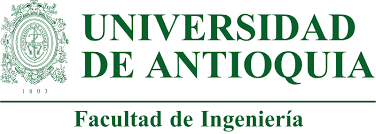

# <font color='056938'> **01.01 - PROYECTO KAGGLE - </font> <font color='8EC044'> Entrega Final "Preprocesado para el Archivo `test`"** </font>

Se realizó un procedimiento similar al procesamiento de datos del archivo train, esto con el fin de que ambos archivos tengan la misma estructura.

## <font color='157699'> **Paso 1:** </font>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='157699'> **Paso 2: Descargar datos directamente desde Kaggle** </font>

- Se creo un archivo kaggle.jsoncon con mi token de autenticación (en kaggle $\to$ Hago clic en el icono de usuario en la parte superior derecha $\to$
ajustes $\to$ API crea un nuevo token);

- Subirlo a este espacio de trabajo del cuaderno;

- Y ejecutar la siguiente celda.

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download --force udea-ai-4-eng-20252-pruebas-saber-pro-colombia

chmod: cannot access './kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in .. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


## <font color='157699'> **Paso 3: Descomprimir e inspeccionar datos** </font>

Se descomprime el fichero.

In [4]:
!unzip udea*.zip > /dev/null

unzip:  cannot find or open udea*.zip, udea*.zip.zip or udea*.zip.ZIP.

No zipfiles found.


In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## <font color='157699'> **Paso 4: Se carga `train.csv` y `test.csv` con la librería `Pandas`** </font>

In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
x = pd.read_csv("test.csv")

## <font color='157699'> **Paso 5: Se procesan los datos de `test`** </font>

In [7]:
x.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           296786 non-null  int64  
 1   PERIODO_ACADEMICO            296786 non-null  int64  
 2   E_PRGM_ACADEMICO             296786 non-null  object 
 3   E_PRGM_DEPARTAMENTO          296786 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  294063 non-null  object 
 5   E_HORASSEMANATRABAJA         283407 non-null  object 
 6   F_ESTRATOVIVIENDA            282991 non-null  object 
 7   F_TIENEINTERNET              285247 non-null  object 
 8   F_EDUCACIONPADRE             286793 non-null  object 
 9   F_TIENELAVADORA              279527 non-null  object 
 10  F_TIENEAUTOMOVIL             277868 non-null  object 
 11  E_PRIVADO_LIBERTAD           296786 non-null  object 
 12  E_PAGOMATRICULAPROPIO        293979 non-null  object 
 13 

In [9]:
k = x.isna().sum()
k[k!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,2723
E_HORASSEMANATRABAJA,13379
F_ESTRATOVIVIENDA,13795
F_TIENEINTERNET,11539
F_EDUCACIONPADRE,9993
F_TIENELAVADORA,17259
F_TIENEAUTOMOVIL,18918
E_PAGOMATRICULAPROPIO,2807
F_TIENECOMPUTADOR,16439
F_TIENEINTERNET.1,11539


In [10]:
x ['PERIODO_ACADEMICO'].unique()

array([20183, 20203, 20212, 20195, 20196, 20194, 20213, 20202, 20184])

In [11]:
x.PERIODO_ACADEMICO.value_counts()

,count
PERIODO_ACADEMICO,
20195,77579
20203,73918
20212,73415
20183,70406
20194,604
20213,492
20202,190
20184,119
20196,63


In [12]:
x ['PERIODO_ACADEMICO'].isna().sum()

np.int64(0)

In [13]:
x ['PERIODO_ACADEMICO'] = x ['PERIODO_ACADEMICO'].astype('category')

In [14]:
x ['PERIODO_ACADEMICO'] = x ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2018.*', '2018', regex=True)
x ['PERIODO_ACADEMICO'] = x ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2019.*', '2019', regex=True)
x ['PERIODO_ACADEMICO'] = x ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2020.*', '2020', regex=True)
x ['PERIODO_ACADEMICO'] = x ['PERIODO_ACADEMICO'].astype(str).str.replace(r'2021.*', '2021', regex=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()

codificador = encode.fit_transform(x [['PERIODO_ACADEMICO']])

arreglo = codificador.toarray()
periodo = pd.DataFrame(arreglo,
                       columns = encode.categories_)

x = pd.concat([x, periodo], axis = 'columns')
x = x.drop('PERIODO_ACADEMICO', axis=1)

In [16]:
x ["E_PRGM_ACADEMICO"].value_counts()

,count
E_PRGM_ACADEMICO,
DERECHO,22984
ADMINISTRACION DE EMPRESAS,22298
CONTADURIA PUBLICA,16861
PSICOLOGIA,13818
INGENIERIA INDUSTRIAL,12516
...,...
INGENIERIA EN DISEÑO INDUSTRIAL,1
LICENC.EN EDUCACION BASICA PRIMARIA ENF.EN CIENCIAS NATURALESEDUC.AMBIENTAL MATEMA.LENGUA CASTELLANA,1
ADMINISTRACION DE EMPRESAS.,1


In [17]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 13.9 MB/s eta 0:00:00


In [18]:
from unidecode import unidecode
import re

replacements = {
    r'INGENIER\?A': 'INGENIERIA',
    r'INGENIIERIA': 'INGENIERIA',
    r'EDUCACI\?N\b': 'EDUCACION',
    r'RECREACI\?N\b': 'RECREACION',
    r'F\?SICA\b': 'FISICA',
    r'ESC\?NICAS\b': 'ESCENICAS',
    r'MATEM\?TICAS\b': 'MATEMATICAS',
    r'FILOSOF\?A\b': 'FILOSOFIA',
    r'DISE\?O\b': 'DISEÑO',
    r'DISE\?\?O\b': 'DISEÑO',
    r'COMUNICACI\?N\b': 'COMUNICACION',
    r'COMUNICACI\?\?N\b': 'COMUNICACION',
    r'GR\?\?FICA\b': 'GRAFICA',
    r'EL\?CTRICA\b': 'ELECTRICA',
    r'QU\?MICA\b': 'QUIMICA',
    r'FARMAC\?UTICA\b': 'FARMACEUTICA',
    r'ADMINISTRACI\?N\b': 'ADMINISTRACION',
    r'P\?BLICA\b': 'PUBLICA',
    r'INGL\?S\b': 'INGLES',
    r'\?NFASIS\b': 'ENFASIS',
    r'GESTI\?N\b': 'GESTION',
    r'M\?SICA\b': 'MUSICA',
    r'ECONOM\?A\b': 'ECONOMIA',
    r'GASTRONOM\?A\b': 'GASTRONOMIA',
    r'B\?SICA\b': 'BASICA',
    r'GEOLOG\?A\b': 'GEOLOGIA',
    r'PEDAGOG\?A\b': 'PEDAGOGIA',
    r'ART\?STICA\b': 'ARTISTICA',
    r'LOG\?STICA\b': 'LOGISTICA'
}

general_replacements = [
    (r'.*INGENIERIA.*', 'INGENIERIA'),
    (r'ADMINISTRACION.*', 'ADMINISTRACION'),
    (r'DISEÑO.*', 'DISEÑO'),
    (r'DISENO.*', 'DISEÑO'),
    (r'LICENCIATURA.*', 'LICENCIATURA'),
    (r'CIENCIA.*', 'CIENCIAS'),
    (r'COMUNICACION.*', 'COMUNICACION'),
    (r'GESTION.*', 'GESTION'),
    (r'FILOSOFIA.*', 'FILOSOFIA'),
    (r'QUIMICA.*', 'QUIMICA'),
    (r'NEGOCIOS.*', 'NEGOCIOS'),
    (r'.*MERCAD.*', 'MERCADEO'),
    (r'MATEMATICAS.*', 'MATEMATICAS'),
    (r'.*ARTE.*', 'ARTES'),
    (r'ESTUDIOS.*', 'ESTUDIOS'),
    (r'FINANZAS.*', 'FINANZAS'),
    (r'CONSTRUCCION.*', 'CONSTRUCCION'),
    (r'DIRECCION.*', 'DIRECCION'),
    (r'RELACIONES.*', 'RELACIONES'),
    (r'GEO.*', 'GEOGRAFIA'),
    (r'PROFESIONAL.*', 'PROFESIONAL'),
    (r'LENG.*', 'LENGUAS'),
    (r'ADMIN.*', 'ADMINISTRACION'),
    (r'.*DEPORT.*', 'DEPORTE'),
    (r'.*BIOLOGIA.*', 'BIOLOGIA'),
    (r'CINE.*', 'CINE'),
    (r'CONTADURIA.*', 'CONTADURIA'),
    (r'COMERCIO.*', 'COMERCIO'),
    (r'.*LITERA.*', 'LITERATURA'),
    (r'.*FILOL.*', 'FILOLOGIA'),
    (r'PUBLICI.*', 'PUBLICIDAD'),
    (r'MARK.*', 'MERCADEO'),
    (r'HISTORIA.*', 'HISTORIA'),
    (r'.*MUSICA.*', 'MUSICA'),
    (r'.*VETE.*', 'VETERINARIA'),
    (r'.*ZOO.*', 'VETERINARIA'),
    (r'.*GASTR.*', 'GASTRONOMIA'),
    (r'.*QUIRURGICA.*', 'MEDICINA'),
    (r'ECONO.*', 'ECONOMIA'),
    (r'GEREN.*', 'GERENCIA'),
    (r'HOTELERIA.*', 'HOTELERIA'),
    (r'.*PSICOLO.*', 'PSICOLOGIA'),
    (r'.*AGRO.*', 'AGRONOMIA')
]

def clean_text(text):
    text = unidecode(text).upper().strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^PROFESIONAL EN\s+', '', text)
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    for pattern, replacement in general_replacements:
        text = re.sub(pattern, replacement, text)
    return text

x ['E_PRGM_ACADEMICO'] = x ['E_PRGM_ACADEMICO'].apply(clean_text)

In [19]:
len(x ['E_PRGM_ACADEMICO'].unique())

109

In [20]:
programas_agrupados=['INGENIERIA','ADMINISTRACION','DISEÑO','LICENCIATURA','CIENCIAS','COMUNICACION','GESTION','FILOSOFIA','QUIMICA','NEGOCIOS','MERCADEO',
'MATEMATICAS','ARTES','ESTUDIOS','FINANZAS','CONSTRUCCION','DIRECCION','RELACIONES','GEOGRAFIA','PROFESIONAL','LENGUAS', 'DEPORTE'
'BIOLOGIA','CINE','CONTADURIA','COMERCIO','LITERATURA','FILOLOGIA','PUBLICIDAD','HISTORIA','MUSICA','VETERINARIA','GASTRONOMIA'
'MEDICINA', 'ECONOMIA','GERENCIA','HOTELERIA','PSICOLOGIA','AGRONOMIA']

programas_otros = [elem for elem in x ['E_PRGM_ACADEMICO'] if elem not in programas_agrupados]

condicion = x ['E_PRGM_ACADEMICO'].isin(programas_otros)
x.loc[condicion, 'E_PRGM_ACADEMICO'] = 'OTRAS'

In [21]:
x ['E_PRGM_ACADEMICO'].unique()

array(['OTRAS', 'ADMINISTRACION', 'INGENIERIA', 'CONTADURIA', 'ECONOMIA',
       'PSICOLOGIA', 'NEGOCIOS', 'VETERINARIA', 'LICENCIATURA', 'GESTION',
       'FILOSOFIA', 'COMUNICACION', 'FINANZAS', 'CIENCIAS', 'DISEÑO',
       'GEOGRAFIA', 'MERCADEO', 'MUSICA', 'COMERCIO', 'CINE',
       'PUBLICIDAD', 'LENGUAS', 'RELACIONES', 'LITERATURA', 'ARTES',
       'MATEMATICAS', 'HOTELERIA', 'QUIMICA', 'AGRONOMIA', 'ESTUDIOS',
       'CONSTRUCCION', 'GERENCIA', 'PROFESIONAL', 'DIRECCION', 'HISTORIA',
       'FILOLOGIA'], dtype=object)

In [22]:
encode = OneHotEncoder()
codificadorPr = encode.fit_transform(x [['E_PRGM_ACADEMICO']])
arregloPr = codificadorPr.toarray()
programa = pd.DataFrame(arregloPr,columns = encode.categories_)

In [23]:
x = pd.concat([x, programa], axis = 'columns')
x = x.drop('E_PRGM_ACADEMICO', axis=1)

In [24]:
x.head()

,ID,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,"(MERCADEO,)","(MUSICA,)","(NEGOCIOS,)","(OTRAS,)","(PROFESIONAL,)","(PSICOLOGIA,)","(PUBLICIDAD,)","(QUIMICA,)","(RELACIONES,)","(VETERINARIA,)"
0,550236,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98545,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,499179,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,782980,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,785185,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
x ['E_PRGM_DEPARTAMENTO'].unique()

array(['BOLIVAR', 'ANTIOQUIA', 'BOGOTÁ', 'SUCRE', 'ATLANTICO', 'VALLE',
       'SANTANDER', 'RISARALDA', 'QUINDIO', 'CASANARE', 'NORTE SANTANDER',
       'CAUCA', 'HUILA', 'CALDAS', 'CHOCO', 'CORDOBA', 'LA GUAJIRA',
       'META', 'NARIÑO', 'BOYACA', 'TOLIMA', 'CUNDINAMARCA', 'MAGDALENA',
       'CESAR', 'PUTUMAYO', 'CAQUETA', 'ARAUCA', 'AMAZONAS', 'VAUPES',
       'SAN ANDRES', 'GUAVIARE'], dtype=object)

In [26]:
#Agrupar region andina
def region_andina(dataframe, columna):
    reemplazos_andina = {
        'ANTIOQUIA': 'ANDINA',
        'BOYACA': 'ANDINA',
        'BOGOTÁ': 'ANDINA',
        'CALDAS': 'ANDINA',
        'CUNDINAMARCA': 'ANDINA',
        'HUILA': 'ANDINA',
        'NORTE SANTANDER': 'ANDINA',
        'QUINDIO': 'ANDINA',
        'RISARALDA': 'ANDINA',
        'SANTANDER': 'ANDINA',
        'TOLIMA': 'ANDINA'
    }
    for valor_original, valor_reemplazo in reemplazos_andina.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region amazonia
def region_amazonia(dataframe, columna):
    reemplazos_amazonia = {
        'AMAZONAS': 'AMAZONIA',
        'CAQUETA': 'AMAZONIA',
        'VAUPES': 'AMAZONIA',
        'GUAINIA': 'AMAZONIA',
        'GUAVIARE': 'AMAZONIA',
        'PUTUMAYO': 'AMAZONIA'
    }
    for valor_original, valor_reemplazo in reemplazos_amazonia.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region pacifica
def region_pacifica(dataframe, columna):
    reemplazos_pacifica = {
        'VALLE': 'PACIFICA',
        'CHOCO': 'PACIFICA',
        'CAUCA': 'PACIFICA',
        'NARIÑO': 'PACIFICA',
    }
    for valor_original, valor_reemplazo in reemplazos_pacifica.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region caribe
def region_caribe(dataframe, columna):
    reemplazos_caribe = {
        'ATLANTICO': 'CARIBE',
        'BOLIVAR': 'CARIBE',
        'CESAR': 'CARIBE',
        'CORDOBA': 'CARIBE',
        'LA GUAJIRA': 'CARIBE',
        'MAGDALENA': 'CARIBE',
        'SUCRE': 'CARIBE',
        'SAN ANDRES': 'CARIBE'
    }
    for valor_original, valor_reemplazo in reemplazos_caribe.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

#Agrupar region orinoquia
def region_orinoquia(dataframe, columna):
    reemplazos_orinoquia = {
        'ARAUCA': 'ORINOQUIA',
        'CASANARE': 'ORINOQUIA',
        'META': 'ORINOQUIA',
        'VICHADA': 'ORINOQUIA'
    }
    for valor_original, valor_reemplazo in reemplazos_orinoquia.items():
        dataframe[columna] = dataframe[columna].astype(str).str.replace(valor_original, valor_reemplazo, regex=True)
    return dataframe

In [27]:
x = region_andina(x, 'E_PRGM_DEPARTAMENTO')
x = region_amazonia(x, 'E_PRGM_DEPARTAMENTO')
x = region_pacifica(x, 'E_PRGM_DEPARTAMENTO')
x = region_caribe(x, 'E_PRGM_DEPARTAMENTO')
x = region_orinoquia(x, 'E_PRGM_DEPARTAMENTO')

In [28]:
print(x ['E_PRGM_DEPARTAMENTO'].unique())
print(x ['E_PRGM_DEPARTAMENTO'].isna().sum())

['CARIBE' 'ANDINA' 'PACIFICA' 'ORINOQUIA' 'AMAZONIA']
0


In [29]:
encode = OneHotEncoder()
codificadorDepto = encode.fit_transform(x [['E_PRGM_DEPARTAMENTO']])

arrayDepartamento = codificadorDepto.toarray()
departamento = pd.DataFrame(arrayDepartamento,
                       columns = encode.categories_)

x = pd.concat([x, departamento], axis = 'columns')
x = x.drop('E_PRGM_DEPARTAMENTO', axis=1)

In [30]:
x.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,"(PSICOLOGIA,)","(PUBLICIDAD,)","(QUIMICA,)","(RELACIONES,)","(VETERINARIA,)","(AMAZONIA,)","(ANDINA,)","(CARIBE,)","(ORINOQUIA,)","(PACIFICA,)"
0,550236,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,98545,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,782980,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,785185,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
x ['E_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Menos de 500 mil', 'Entre 2.5 millones y menos de 4 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Más de 7 millones',
       'Entre 4 millones y menos de 5.5 millones',
       'Entre 5.5 millones y menos de 7 millones', 'No pagó matrícula',
       nan], dtype=object)

In [32]:
x ['E_VALORMATRICULAUNIVERSIDAD'].isna().sum()

np.int64(2723)

In [33]:
x ['E_VALORMATRICULAUNIVERSIDAD'] = x ['E_VALORMATRICULAUNIVERSIDAD'].fillna('No pagó matrícula')

In [34]:
x ['E_VALORMATRICULAUNIVERSIDAD'].isna().sum()

np.int64(0)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
valores_matricula = ['No pagó matrícula','Menos de 500 mil','Entre 500 mil y menos de 1 millón',
                     'Entre 1 millón y menos de 2.5 millones',
                     'Entre 2.5 millones y menos de 4 millones',
                     'Entre 4 millones y menos de 5.5 millones',
                     'Entre 5.5 millones y menos de 7 millones','Más de 7 millones']

encode = OneHotEncoder()

codificadorPr = encode.fit_transform(x [['E_VALORMATRICULAUNIVERSIDAD']])
arregloPr = codificadorPr.toarray()
matricula = pd.DataFrame(arregloPr,
                       columns = encode.categories_)

In [36]:
x = pd.concat([x, matricula], axis = 'columns')
x = x.drop('E_VALORMATRICULAUNIVERSIDAD',axis=1)

In [37]:
x.head()

,ID,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,...,"(ORINOQUIA,)","(PACIFICA,)","(Entre 1 millón y menos de 2.5 millones,)","(Entre 2.5 millones y menos de 4 millones,)","(Entre 4 millones y menos de 5.5 millones,)","(Entre 5.5 millones y menos de 7 millones,)","(Entre 500 mil y menos de 1 millón,)","(Menos de 500 mil,)","(Más de 7 millones,)","(No pagó matrícula,)"
0,550236,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,98545,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,499179,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,782980,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,785185,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x ['E_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', 'Entre 21 y 30 horas', '0',
       'Entre 11 y 20 horas', 'Más de 30 horas', nan], dtype=object)

In [39]:
x ['E_HORASSEMANATRABAJA'].value_counts()

,count
E_HORASSEMANATRABAJA,
Más de 30 horas,106189
0,50422
Entre 11 y 20 horas,49386
Entre 21 y 30 horas,39931
Menos de 10 horas,37479


In [40]:
x ['E_HORASSEMANATRABAJA'].isna().sum()

np.int64(13379)

In [41]:
x ['E_HORASSEMANATRABAJA'] = x ['E_HORASSEMANATRABAJA'].fillna('0')

In [42]:
x ['E_HORASSEMANATRABAJA'].isna().sum()

np.int64(0)

In [43]:
horas_trabajo = ['0','Menos de 10 horas','Entre 11 y 20 horas',
                'Entre 21 y 30 horas',
                'Más de 30 horas']
encode = OneHotEncoder()

#Trabaja con dataframes, no series
codificadorPr = encode.fit_transform(x [['E_HORASSEMANATRABAJA']])
arregloPr = codificadorPr.toarray()
horas_trabajo = pd.DataFrame(arregloPr,
                       columns = encode.categories_)
x = pd.concat([x, horas_trabajo], axis = 'columns')
x = x.drop('E_HORASSEMANATRABAJA',axis=1)

In [44]:
x.head()

,ID,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,...,"(Entre 5.5 millones y menos de 7 millones,)","(Entre 500 mil y menos de 1 millón,)","(Menos de 500 mil,)","(Más de 7 millones,)","(No pagó matrícula,)","(0,)","(Entre 11 y 20 horas,)","(Entre 21 y 30 horas,)","(Menos de 10 horas,)","(Más de 30 horas,)"
0,550236,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,499179,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,782980,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,785185,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
x ['F_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 2', 'Estrato 1', 'Estrato 4', nan,
       'Estrato 6', 'Estrato 5', 'Sin Estrato'], dtype=object)

In [46]:
x ['F_ESTRATOVIVIENDA'].value_counts()

,count
F_ESTRATOVIVIENDA,
Estrato 2,99288
Estrato 3,90719
Estrato 1,48092
Estrato 4,27823
Estrato 5,10194
Estrato 6,5451
Sin Estrato,1424


In [47]:
x ['F_ESTRATOVIVIENDA'].isna().sum()

np.int64(13795)

In [48]:
x ['F_ESTRATOVIVIENDA'] = x ['F_ESTRATOVIVIENDA'].fillna(x ['F_ESTRATOVIVIENDA'].mode()[0])

In [49]:
x ['F_ESTRATOVIVIENDA'].isna().sum()

np.int64(0)

In [50]:
estratos = ['Sin Estrato','Estrato 1','Estrato 2',
            'Estrato 3', 'Estrato 4', 'Estrato 5',
            'Estrato 6']
encode = OneHotEncoder()

#Trabaja con dataframes, no series
codificadorPr = encode.fit_transform(x [['F_ESTRATOVIVIENDA']])
arregloPr = codificadorPr.toarray()
estrato = pd.DataFrame(arregloPr,
                       columns = encode.categories_)

x = pd.concat([x, estrato], axis = 'columns')
x = x.drop('F_ESTRATOVIVIENDA',axis=1)

In [51]:
x.head()

,ID,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,...,"(Entre 21 y 30 horas,)","(Menos de 10 horas,)","(Más de 30 horas,)","(Estrato 1,)","(Estrato 2,)","(Estrato 3,)","(Estrato 4,)","(Estrato 5,)","(Estrato 6,)","(Sin Estrato,)"
0,550236,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,98545,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,499179,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,782980,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,785185,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
x ['F_TIENEINTERNET'].unique()

array(['Si', 'No', nan], dtype=object)

In [53]:
x ['F_TIENEINTERNET'].isna().sum()

np.int64(11539)

In [54]:
x ['F_TIENEINTERNET'].value_counts()

,count
F_TIENEINTERNET,
Si,254075
No,31172


In [55]:
x ['F_TIENEINTERNET'] = x ['F_TIENEINTERNET'].fillna("No")

In [56]:
x ['F_TIENEINTERNET'].isna().sum()

np.int64(0)

In [57]:
x ['F_TIENEINTERNET'] = x ['F_TIENEINTERNET'].replace(r'Si', 1.).infer_objects()
x ['F_TIENEINTERNET'] = x ['F_TIENEINTERNET'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-900958989.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['F_TIENEINTERNET'] = x ['F_TIENEINTERNET'].replace(r'No', 0.).infer_objects()


In [58]:
x ['F_TIENEINTERNET'].value_counts()

,count
F_TIENEINTERNET,
1.0,254075
0.0,42711


In [59]:
x.head()

,ID,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,...,"(Entre 21 y 30 horas,)","(Menos de 10 horas,)","(Más de 30 horas,)","(Estrato 1,)","(Estrato 2,)","(Estrato 3,)","(Estrato 4,)","(Estrato 5,)","(Estrato 6,)","(Sin Estrato,)"
0,550236,1.0,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,98545,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,499179,1.0,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,782980,0.0,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,785185,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
x ['F_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa',
       'Secundaria (Bachillerato) incompleta', 'Primaria incompleta',
       'Ninguno', 'Primaria completa', 'Postgrado', nan,
       'Educación profesional completa',
       'Técnica o tecnológica incompleta',
       'Educación profesional incompleta', 'No sabe', 'No Aplica'],
      dtype=object)

In [66]:
x ['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,54838
Primaria incompleta,53432
Educación profesional completa,35412
Secundaria (Bachillerato) incompleta,30641
Técnica o tecnológica completa,27045
Primaria completa,24131
Postgrado,19287
Educación profesional incompleta,11744
Técnica o tecnológica incompleta,9677


In [67]:
x ['F_EDUCACIONPADRE'].isna().sum()

np.int64(9993)

In [68]:
x ['F_EDUCACIONPADRE'] = x ['F_EDUCACIONPADRE'].replace(r'Ninguno', 'No Aplica').infer_objects()
x ['F_EDUCACIONPADRE'] = x ['F_EDUCACIONPADRE'].replace(r'No sabe', 'No Aplica').infer_objects()
x ['F_EDUCACIONPADRE'] = x ['F_EDUCACIONPADRE'].fillna('No Aplica')

In [69]:
x ['F_EDUCACIONPADRE'].isna().sum()

np.int64(0)

In [70]:
x ['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,54838
Primaria incompleta,53432
Educación profesional completa,35412
Secundaria (Bachillerato) incompleta,30641
No Aplica,30579
Técnica o tecnológica completa,27045
Primaria completa,24131
Postgrado,19287
Educación profesional incompleta,11744


In [71]:
codificadorPr = encode.fit_transform(x [['F_EDUCACIONPADRE']])

arregloPr = codificadorPr.toarray()
edu_padre = pd.DataFrame(arregloPr,
                       columns = encode.categories_)

x = pd.concat([x, edu_padre], axis = 'columns')
x = x.drop('F_EDUCACIONPADRE',axis=1)

In [72]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,Si,No,N,Si,Si,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,Si,No,N,No,No,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
x ['F_TIENELAVADORA'].unique()

array(['Si', nan, 'No'], dtype=object)

In [74]:
x ['F_TIENELAVADORA'].value_counts()

,count
F_TIENELAVADORA,
Si,241565
No,37962


In [75]:
x ['F_TIENELAVADORA'].isna().sum()

np.int64(17259)

In [76]:
x ['F_TIENELAVADORA'] = x ['F_TIENELAVADORA'].fillna(x ['F_TIENELAVADORA'].mode()[0])

In [77]:
x ['F_TIENELAVADORA'].isna().sum()

np.int64(0)

In [78]:
x ['F_TIENELAVADORA'] = x ['F_TIENELAVADORA'].replace(r'Si', 1.).infer_objects()
x ['F_TIENELAVADORA'] = x ['F_TIENELAVADORA'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-1868870042.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['F_TIENELAVADORA'] = x ['F_TIENELAVADORA'].replace(r'No', 0.).infer_objects()


In [79]:
x ['F_TIENELAVADORA'].value_counts()

,count
F_TIENELAVADORA,
1.0,258824
0.0,37962


In [80]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,No,N,Si,Si,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,No,N,No,No,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
x ['F_TIENEAUTOMOVIL'].unique()

array(['No', 'Si', nan], dtype=object)

In [82]:
x ['F_TIENEAUTOMOVIL'].value_counts()

,count
F_TIENEAUTOMOVIL,
No,176625
Si,101243


In [83]:
x ['F_TIENEAUTOMOVIL'].isna().sum()

np.int64(18918)

In [84]:
x ['F_TIENEAUTOMOVIL'] = x ['F_TIENEAUTOMOVIL'].fillna(x ['F_TIENEAUTOMOVIL'].mode()[0])

In [85]:
x ['F_TIENEAUTOMOVIL'].isna().sum()

np.int64(0)

In [86]:
x ['F_TIENEAUTOMOVIL'] = x ['F_TIENEAUTOMOVIL'].replace(r'Si', 1.).infer_objects()
x ['F_TIENEAUTOMOVIL'] = x ['F_TIENEAUTOMOVIL'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-1386379058.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['F_TIENEAUTOMOVIL'] = x ['F_TIENEAUTOMOVIL'].replace(r'No', 0.).infer_objects()


In [87]:
x ['F_TIENEAUTOMOVIL'].value_counts()

,count
F_TIENEAUTOMOVIL,
0.0,195543
1.0,101243


In [88]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,N,Si,Si,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,0.0,N,No,Si,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,0.0,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,0.0,N,No,No,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
x ['E_PRIVADO_LIBERTAD'].unique()

array(['N', 'S'], dtype=object)

In [90]:
x ['E_PRIVADO_LIBERTAD'].value_counts()

,count
E_PRIVADO_LIBERTAD,
N,296773
S,13


In [91]:
x ['E_PRIVADO_LIBERTAD'].isna().sum()

np.int64(0)

In [92]:
x ['E_PRIVADO_LIBERTAD'] = x ['E_PRIVADO_LIBERTAD'].fillna(x ['E_PRIVADO_LIBERTAD'].mode()[0])

In [93]:
x ['E_PRIVADO_LIBERTAD'].isna().sum()

np.int64(0)

In [94]:
x ['E_PRIVADO_LIBERTAD'] = x ['E_PRIVADO_LIBERTAD'].replace(r'S', 1.).infer_objects()
x ['E_PRIVADO_LIBERTAD'] = x ['E_PRIVADO_LIBERTAD'].replace(r'N', 0.).infer_objects()

/tmp/ipython-input-976754683.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['E_PRIVADO_LIBERTAD'] = x ['E_PRIVADO_LIBERTAD'].replace(r'N', 0.).infer_objects()


In [95]:
x ['E_PRIVADO_LIBERTAD'].value_counts()

,count
E_PRIVADO_LIBERTAD,
0.0,296773
1.0,13


In [96]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,0.0,Si,Si,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,0.0,0.0,No,Si,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,0.0,0.0,No,Si,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,0.0,0.0,No,No,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,0.0,No,Si,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
x ['E_PAGOMATRICULAPROPIO'].unique()

array(['Si', 'No', nan], dtype=object)

In [98]:
x ['E_PAGOMATRICULAPROPIO'].value_counts()

,count
E_PAGOMATRICULAPROPIO,
No,163869
Si,130110


In [99]:
x ['E_PAGOMATRICULAPROPIO'].isna().sum()

np.int64(2807)

In [100]:
x ['E_PAGOMATRICULAPROPIO'] = x ['E_PAGOMATRICULAPROPIO'].fillna(x ['E_PAGOMATRICULAPROPIO'].mode()[0])

In [101]:
x ['E_PAGOMATRICULAPROPIO'].isna().sum()

np.int64(0)

In [102]:
x ['E_PAGOMATRICULAPROPIO'] = x ['E_PAGOMATRICULAPROPIO'].replace(r'Si', 1.).infer_objects()
x ['E_PAGOMATRICULAPROPIO'] = x ['E_PAGOMATRICULAPROPIO'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-4235474028.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['E_PAGOMATRICULAPROPIO'] = x ['E_PAGOMATRICULAPROPIO'].replace(r'No', 0.).infer_objects()


In [103]:
x ['E_PAGOMATRICULAPROPIO'].value_counts()

,count
E_PAGOMATRICULAPROPIO,
0.0,166676
1.0,130110


In [104]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,0.0,1.0,Si,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,0.0,0.0,0.0,Si,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,0.0,0.0,0.0,Si,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,0.0,0.0,0.0,No,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,0.0,0.0,Si,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
x ['F_TIENECOMPUTADOR'].unique()

array(['Si', 'No', nan], dtype=object)

In [106]:
x ['F_TIENECOMPUTADOR'].value_counts()

,count
F_TIENECOMPUTADOR,
Si,255996
No,24351


In [107]:
x ['F_TIENECOMPUTADOR'].isna().sum()

np.int64(16439)

In [108]:
x ['F_TIENECOMPUTADOR'] = x ['F_TIENECOMPUTADOR'].fillna(x ['F_TIENECOMPUTADOR'].mode()[0])

In [109]:
x ['F_TIENECOMPUTADOR'].isna().sum()

np.int64(0)

In [110]:
x ['F_TIENECOMPUTADOR'] = x ['F_TIENECOMPUTADOR'].replace(r'Si', 1.).infer_objects()
x ['F_TIENECOMPUTADOR'] = x ['F_TIENECOMPUTADOR'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-3202160504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['F_TIENECOMPUTADOR'] = x ['F_TIENECOMPUTADOR'].replace(r'No', 0.).infer_objects()


In [111]:
x ['F_TIENECOMPUTADOR'].value_counts()

,count
F_TIENECOMPUTADOR,
1.0,272435
0.0,24351


In [112]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,0.0,1.0,1.0,Si,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,0.0,0.0,0.0,1.0,Si,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,0.0,0.0,0.0,1.0,Si,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,0.0,0.0,0.0,0.0,No,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,0.0,0.0,1.0,Si,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [113]:
x ['F_TIENEINTERNET.1'].unique()

array(['Si', 'No', nan], dtype=object)

In [114]:
x ['F_TIENEINTERNET.1'].value_counts()

,count
F_TIENEINTERNET.1,
Si,254075
No,31172


In [115]:
x ['F_TIENEINTERNET.1'].isna().sum()

np.int64(11539)

In [116]:
x ['F_TIENEINTERNET.1'] = x ['F_TIENEINTERNET.1'].fillna(x ['F_TIENEINTERNET.1'].mode()[0])

In [117]:
x ['F_TIENEINTERNET.1'].isna().sum()

np.int64(0)

In [118]:
x ['F_TIENEINTERNET.1'] = x ['F_TIENEINTERNET.1'].replace(r'Si', 1.).infer_objects()
x ['F_TIENEINTERNET.1'] = x ['F_TIENEINTERNET.1'].replace(r'No', 0.).infer_objects()

/tmp/ipython-input-2391818764.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x ['F_TIENEINTERNET.1'] = x ['F_TIENEINTERNET.1'].replace(r'No', 0.).infer_objects()


In [119]:
x ['F_TIENEINTERNET.1'].value_counts()

,count
F_TIENEINTERNET.1,
1.0,265614
0.0,31172


In [120]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Primaria completa,0.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,98545,1.0,1.0,0.0,0.0,0.0,1.0,1.0,Técnica o tecnológica completa,0.227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,499179,1.0,1.0,0.0,0.0,0.0,1.0,1.0,Secundaria (Bachillerato) completa,0.285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,782980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Primaria incompleta,0.160,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,0.0,0.0,1.0,1.0,Secundaria (Bachillerato) completa,0.209,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [121]:
x ['F_EDUCACIONMADRE'].unique()

array(['Primaria completa', 'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', nan,
       'Ninguno', 'Educación profesional completa',
       'Técnica o tecnológica incompleta',
       'Educación profesional incompleta', 'No sabe', 'No Aplica'],
      dtype=object)

In [122]:
x ['F_EDUCACIONMADRE'].value_counts()

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,60649
Primaria incompleta,42149
Técnica o tecnológica completa,38571
Educación profesional completa,36477
Secundaria (Bachillerato) incompleta,34566
Primaria completa,24399
Postgrado,20049
Técnica o tecnológica incompleta,11650
Educación profesional incompleta,9647


In [123]:
x ['F_EDUCACIONMADRE'].isna().sum()

np.int64(10223)

In [124]:
x ['F_EDUCACIONMADRE'] = x ['F_EDUCACIONMADRE'].replace(r'Ninguno', 'No Aplica').infer_objects()
x ['F_EDUCACIONMADRE'] = x ['F_EDUCACIONMADRE'].replace(r'No sabe', 'No Aplica').infer_objects()
x ['F_EDUCACIONMADRE'] = x ['F_EDUCACIONMADRE'].fillna('No Aplica')

In [125]:
x ['F_EDUCACIONMADRE'].isna().sum()

np.int64(0)

In [126]:
encode = OneHotEncoder()

codificadorPr = encode.fit_transform(x [['F_EDUCACIONMADRE']])

arregloPr = codificadorPr.toarray()
edu_madre = pd.DataFrame(arregloPr,
                       columns = encode.categories_)

x = pd.concat([x, edu_madre], axis = 'columns')
x = x.drop('F_EDUCACIONMADRE',axis=1)

In [127]:
x.head()

,ID,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,INDICADOR_1,INDICADOR_2,...,"(Educación profesional completa,)","(Educación profesional incompleta,)","(No Aplica,)","(Postgrado,)","(Primaria completa,)","(Primaria incompleta,)","(Secundaria (Bachillerato) completa,)","(Secundaria (Bachillerato) incompleta,)","(Técnica o tecnológica completa,)","(Técnica o tecnológica incompleta,)"
0,550236,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.328,0.219,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,98545,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.227,0.283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,499179,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.285,0.228,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,782980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.160,0.408,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,785185,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.209,0.283,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [128]:
file_excel = z.to_csv("x_PPC2.csv", index = False)

In [129]:
from google.colab import files
files.download('x_PPC2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>